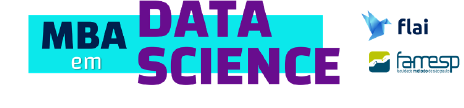

# ***Projeto Machine Learning - MBA Data Sciente***

# **1- Campanha de Marketing SuperLoja**
###Entendendo o contexto

Previsão a resposta à oferta da campanha de associação Gold

***Contexto -*** Uma loja de varejo está planejando a liquidação de final de ano. Eles querem lançar uma nova oferta – adesão ouro, que dá um desconto de 30% em todas as compras, por apenas US\$ 299, o que equivale a US\$ 999 nos outros dias. Será válido apenas para clientes existentes e a campanha através de chamadas telefônicas. A gestão considera que a melhor forma de reduzir o custo da campanha é fazer um modelo preditivo que classifique os clientes que poderão adquirir a oferta.

***Objetivo -*** A loja de varejo deseja prever a probabilidade de o cliente dar uma resposta positiva e identificar os diferentes fatores que afetam a resposta do cliente. Vamos analisar os dados fornecidos para identificar esses fatores e, em seguida, construir um modelo de previsão para prever a probabilidade de um cliente dar uma resposta positiva.

### **Dataset**
Este conjunto de dados, oriundos do Kaggle, foram estruturados de forma que cada linha é um cliente, e os atributos são:


*   **Responde (target):** (1, se o cliente aceitou a oferta na última campanha
0, caso contrário)
*   **ID:** id exclusivo de cada cliente
*   **Year_Birth:** idade do cliente
*   **Complain:** (1, se o cliente reclamou nos últimos 2 anos; 0 caso contrário)
*   **Dt_Customer:** Data de cadastro do cliente na empresa
*   **Education:** nível de escolaridade do cliente
*   **Marital:** Estado civil do cliente
*   **Kidhome:** Número de crianças pequenas na residência do cliente
*   **Teenhome:** Número de adolescentes na residência do cliente
*   **Income:** Renda familiar anual do cliente
*   **MntFishProducts:** Valor gasto em produtos de pesca nos últimos 2 anos.
*   **MntMeatProducts:** Valor gasto em produtos de carne nos últimos 2 anos.
*   **MntFruits:** Valor gasto em produtos de frutas nos últimos 2 anos.
*   **MntSweetProducts:** Valor gasto em produtos de doces nos últimos 2 anos.
*   **MntWines:** Valor gasto em produtos de vinícolas nos últimos 2 anos.
*   **MntGoldProds:** Valor gasto em produtos de ouro nos últimos 2 anos.
*   **NumDealsPurchases:** Número de compras realizadas com descontos.
*   **NumCatalogPurchases:** Número de compras realizadas por catálogo (compra de mercadorias a serem enviadas pelo correio)
*   **NumStorePurchases:** Número de compras feitas diretamente nas lojas.
*   **NumWebPurchases:** Número de compras realizadas pelo site da empresa.
*   **NumWebVisitsMonth:** Número de visitas ao site da empresa no último mês.
*   **Recency:** Número de dias desde a última compra.



## **Hands-on**

1. **Carregar dados**;
2. **Entender a estrutura dos dados**;
3. **Transformar dados**;
4. **Elaboração do Gráfico**.

In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

# Modelagem dos dados
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Métricas e funçãos úteis
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

### **Carregando o dataset**

https://raw.githubusercontent.com/damallys/Projeto_MBA_Machine-Learning/main/superstore_data.csv


In [2]:
# Importando o conjunto de dados
df = pd.read_csv(
    filepath_or_buffer = 'https://raw.githubusercontent.com/damallys/Projeto_MBA_Machine-Learning/main/superstore_data.csv',
    sep=',',
    decimal='.'
)

In [3]:
# Espiando o conjunto de dados
pd.set_option('display.max_columns', None)
df.head(5)

,Id,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/2014,0,189,104,379,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/2014,0,464,5,64,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/2014,0,134,11,59,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,11/5/2014,0,10,0,1,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,8/4/2014,0,6,16,24,11,0,34,2,3,1,2,7,1,0


Os dados são relacionados a informações dos clientes, como renda, nível de educação, status civil, membros da familia, compras e resposta à campanha.

## **2- Análise Exploratória**

In [4]:
# Espiando a estrutura do conjunto de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

*   O conjunto de dados contém 2.240 linhas e 22 variáveis;
*   A variável Income (renda), possui valores nulos, vamos preencher esses valores;
*   A variável Dt_Customer deve ser alterada para o tipo data;

In [5]:
df.describe()

,Id,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.149107,0.009375
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000


In [6]:
# Renda média por nível de escolaridade
incomebyEducation = df.groupby('Education')['Income'].median().to_dict()

# update de renda nula
df['Income']=df['Income'].fillna(df['Education'].map(incomebyEducation))

## **Variáveis categóricas**


In [7]:
# Estado civil
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

*  Dependendo se na casa do cliente tem
criança ou adolescente, mudaremos Alone, Absurd, yolo ou outros para solteiros/casado.

In [8]:
df['Marital_Status'] = df.apply(lambda x: 'Married'
                                if ((x['Marital_Status'] not in ['Single', 'Married', 'Divorced', 'Together', 'Widow'])
                                    & ((x['Kidhome'] > 0) | (x['Teenhome'] > 0)))
                                else x['Marital_Status'],
                                axis=1)

df['Marital_Status'] = df.apply(lambda x: 'Single'
                                if ((x['Marital_Status'] not in ['Single', 'Married', 'Divorced', 'Together', 'Widow'])
                                    & ((x['Kidhome'] == 0) & (x['Teenhome'] == 0)))
                                else x['Marital_Status'],
                                axis=1)

df['Marital_Status'].value_counts()

Married     869
Together    580
Single      482
Divorced    232
Widow        77
Name: Marital_Status, dtype: int64

In [9]:
# Nível de educação
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [10]:
# Codificando
df = df.rename(columns={'Education': 'education',
                         'Marital_Status': 'marital',
                         })

In [11]:
df = pd.get_dummies(df, drop_first = False, columns=['education', 'marital'])
df.columns

Index(['Id', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Response', 'Complain',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'marital_Divorced',
       'marital_Married', 'marital_Single', 'marital_Together',
       'marital_Widow'],
      dtype='object')

In [12]:
# Alterando a data em que o cliente ingressou nos dias do clientes desde a adesão
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Customer_Days'] = (datetime.datetime.now() - df['Dt_Customer'])
df['Customer_Days'] = df['Customer_Days'].dt.days

df['Customer_Days'].describe()

count    2240.000000
mean     3769.043304
std       232.229893
min      3257.000000
25%      3597.750000
50%      3770.000000
75%      3942.250000
max      4320.000000
Name: Customer_Days, dtype: float64

In [13]:
# Calculando a idade do cliente
df['Age'] = datetime.datetime.now().year - df['Year_Birth']
df['Age'].describe()

count    2240.000000
mean       54.194196
std        11.984069
min        27.000000
25%        46.000000
50%        53.000000
75%        64.000000
max       130.000000
Name: Age, dtype: float64

In [14]:
# Alterando a idade para 100 para qualquer pessoa > 100 anos
df.loc[df['Age'] > 100, 'Age'] = 100

In [15]:
# Total gasto
df['MntTotal'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# Excluindo gasto com ouro Gold
df['MntRegularProds'] =  df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts']

df[['MntTotal', 'MntRegularProds']].describe()

,MntTotal,MntRegularProds
count,2240.000000,2240.000000
mean,605.798214,561.776339
std,602.249288,576.613680
min,5.000000,4.000000
25%,68.750000,55.000000
50%,396.000000,341.000000
75%,1045.500000,964.000000
max,2525.000000,2491.000000


In [16]:
# Eliminando colunas desnecessárias
print(df.shape)
df = df.drop(['Id','Dt_Customer', 'Year_Birth'], axis=1)

(2240, 34)


In [17]:
print(df.shape)

(2240, 31)


In [18]:
# Verificando se existe valor duplicados
df.duplicated().sum()

182

In [19]:
df[df.duplicated()].head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,marital_Divorced,marital_Married,marital_Single,marital_Together,marital_Widow,Customer_Days,Age,MntTotal,MntRegularProds
9,65324.0,0,1,0,384,0,102,21,32,5,3,6,2,9,4,0,0,0,0,0,0,1,0,1,0,0,0,3292,69,544,539
27,54450.0,1,1,0,454,0,171,8,19,32,12,9,2,8,8,0,0,0,0,1,0,0,0,0,0,1,0,4070,67,684,652
81,68695.0,0,0,3,458,81,356,106,50,40,1,4,4,7,2,0,0,0,0,1,0,0,0,0,0,1,0,3421,54,1091,1051
96,58646.0,0,1,3,62,1,44,6,5,22,1,2,1,4,4,0,0,0,0,0,1,0,0,1,0,0,0,3683,61,140,118
123,33039.0,1,0,4,30,8,12,8,8,12,1,2,0,4,5,0,0,0,0,1,0,0,0,1,0,0,0,3710,45,78,66




*   Verificamos que existe 182 linhas duplicadas, o que representa 8% dos dados.
*   Vamos retirar os valores duplicados




In [20]:
# Tirando os valores duplicados
print(df.shape)
df=df.drop_duplicates()
print(df.shape)

(2240, 31)
(2058, 31)


## **Estatísticas descritivas**

In [21]:
df = df.reindex(columns=['Age','education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master',
                         'education_PhD', 'Income','marital_Single', 'marital_Married', 'marital_Together', 'marital_Divorced', 'marital_Widow',
                         'Kidhome', 'Teenhome', 'Recency', 'NumWebVisitsMonth', 'Customer_Days', 'Complain',
                         'MntTotal', 'MntRegularProds','MntWines', 'MntFruits','MntMeatProducts',
                         'MntFishProducts', 'MntSweetProducts','MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                         'NumCatalogPurchases', 'NumStorePurchases','Response'
                        ]
               )

In [22]:
df[['Age','education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD',
    'Income','marital_Single', 'marital_Married', 'marital_Together', 'marital_Widow',
    'Kidhome', 'Teenhome']].describe()

,Age,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,Income,marital_Single,marital_Married,marital_Together,marital_Widow,Kidhome,Teenhome
count,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000
mean,54.175413,0.091351,0.023810,0.500486,0.165695,0.218659,52351.434159,0.218659,0.388727,0.253158,0.034500,0.445578,0.509232
std,11.788562,0.288177,0.152492,0.500121,0.371897,0.413437,25378.985059,0.413437,0.487580,0.434927,0.182553,0.537556,0.546489
min,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,46.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35701.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,53.000000,0.000000,0.000000,1.000000,0.000000,0.000000,51650.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,64.000000,0.000000,0.000000,1.000000,0.000000,0.000000,68242.500000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,666666.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000


In [23]:
# Atividades
df[['Recency', 'NumWebVisitsMonth', 'NumDealsPurchases', 'Customer_Days', 'Complain']].describe()

,Recency,NumWebVisitsMonth,NumDealsPurchases,Customer_Days,Complain
count,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000
mean,48.951895,5.319728,2.339164,3768.165695,0.009718
std,28.999189,2.439907,1.942947,232.515885,0.098124
min,0.000000,0.000000,0.000000,3257.000000,0.000000
25%,24.000000,3.000000,1.000000,3596.000000,0.000000
50%,49.000000,6.000000,2.000000,3768.500000,0.000000
75%,74.000000,7.000000,3.000000,3941.000000,0.000000
max,99.000000,20.000000,15.000000,4320.000000,1.000000


In [24]:
# Compras
df[['MntTotal', 'MntRegularProds','MntWines', 'MntFruits','MntMeatProducts',
     'MntFishProducts', 'MntSweetProducts','MntGoldProds']].describe()

,MntTotal,MntRegularProds,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds
count,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000,2058.000000
mean,606.240525,562.367347,303.921769,26.234694,167.704568,37.329446,27.176871,43.873178
std,602.838230,577.335025,336.528217,39.750728,228.303238,54.657215,41.714004,52.126598
min,5.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,69.000000,55.000000,23.000000,1.000000,16.000000,3.000000,1.000000,9.000000
50%,396.500000,341.500000,174.000000,8.000000,67.000000,12.000000,8.000000,24.000000
75%,1046.500000,963.500000,504.000000,33.000000,229.500000,50.000000,33.750000,56.000000
max,2525.000000,2491.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000


In [25]:
# Compras pelos canais
df[['NumDealsPurchases', 'NumWebPurchases',
    'NumCatalogPurchases', 'NumStorePurchases']].describe()

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
count,2058.000000,2058.000000,2058.000000,2058.000000
mean,2.339164,4.098639,2.660836,5.770651
std,1.942947,2.797577,2.933824,3.239113
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,0.000000,3.000000
50%,2.000000,4.000000,2.000000,5.000000
75%,3.000000,6.000000,4.000000,8.000000
max,15.000000,27.000000,28.000000,13.000000




Verificaremos as novas variáveis e se elas são úteis para nossa análise:

*   Número total de compras pelos canais: Web, Catálago e Loja Física;
*   Valor médio das compras (considerando compra de ouro ou não);
*   A influência do negócio na compra: o número médio de itens por compra.



### **Número de compras**

In [26]:
# Total número de compras
df['NumPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df['NumPurchases'].describe()

count    2058.000000
mean       12.530126
std         7.188098
min         0.000000
25%         6.000000
50%        12.000000
75%        18.000000
max        32.000000
Name: NumPurchases, dtype: float64

Median: 12.0


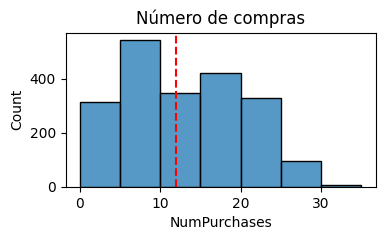

In [27]:
# Número de compras
plt.figure(figsize=(4,2))
sns.histplot(x=df['NumPurchases'], bins=range(0,40,5))
median = df['NumPurchases'].median()
plt.axvline(median, color='red', linestyle='--')
plt.title("Número de compras")
print('Median: {}'.format(median))



In [28]:
# Valor médio por compra
df['AvgMntPerPurchase'] = df['MntTotal']/df['NumPurchases']
# Muda o inf para 0
df.loc[df['AvgMntPerPurchase']==np.inf, 'AvgMntPerPurchase'] = 0
df['AvgMntPerPurchase'].describe()

count    2058.000000
mean       38.280329
std        47.201341
min         0.000000
25%        12.839286
50%        29.733333
75%        50.133361
max      1679.000000
Name: AvgMntPerPurchase, dtype: float64

Median: 29.733333333333334


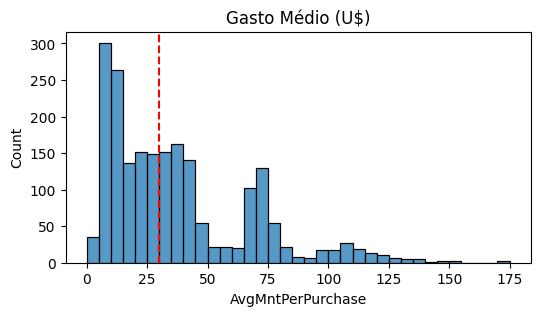

In [29]:
plt.figure(figsize=(6,3))
sns.histplot(x=df['AvgMntPerPurchase'], bins=range(0,180,5))
median = df['AvgMntPerPurchase'].median()
plt.axvline(median, color='red', linestyle='--')
plt.title("Gasto Médio (U\$)")
print('Median: {}'.format(median))



*   Gastos médios interessantes entre U\$65 e U\$70. Pode estar relacionado a alguma oferta, como freta grátis.




Vamos excluir a compra de ouro

In [30]:
# Valor médio por compra normal
df['AvgRegMntPerPurchase'] = df['MntRegularProds']/df['NumPurchases']
df.loc[df['AvgRegMntPerPurchase']==np.inf, 'AvgRegMntPerPurchase'] = 0

df['AvgRegMntPerPurchase'].describe()

count    2058.000000
mean       35.028542
std        46.183245
min         0.000000
25%        10.171296
50%        26.307692
75%        45.875641
max      1657.000000
Name: AvgRegMntPerPurchase, dtype: float64

Median: 26.307692307692307


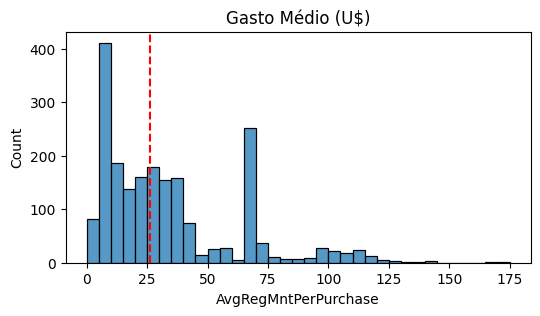

In [31]:
plt.figure(figsize=(6,3))
sns.histplot(x=df['AvgRegMntPerPurchase'], bins=range(0,180,5))
median = df['AvgRegMntPerPurchase'].median()
plt.axvline(median, color='red', linestyle='--')
plt.title("Gasto Médio (U\$)")
print('Median: {}'.format(median))

In [32]:
# # A influência das negociações no número de compras
df['DealPerPurchase'] = df['NumDealsPurchases']/df['NumPurchases']
df.loc[df['DealPerPurchase']==np.inf, 'DealPerPurchase'] = 0
df.loc[df['DealPerPurchase'].isna(), 'DealPerPurchase'] = 0

df['DealPerPurchase'].describe()

count    2058.000000
mean        0.248753
std         0.368314
min         0.000000
25%         0.083333
50%         0.200000
75%         0.333333
max        15.000000
Name: DealPerPurchase, dtype: float64

15 ofertas por compra!
Quantos estão acima de 1?

In [33]:
# 15 ofertas por compra! Quantos estão acima de 1?
df[df['DealPerPurchase'] > 1].head()

,Age,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,Income,marital_Single,marital_Married,marital_Together,marital_Divorced,marital_Widow,Kidhome,Teenhome,Recency,NumWebVisitsMonth,Customer_Days,Complain,MntTotal,MntRegularProds,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Response,NumPurchases,AvgMntPerPurchase,AvgRegMntPerPurchase,DealPerPurchase
1416,32,0,0,1,0,0,8028.0,1,0,0,0,0,0,0,62,19,4066,0,178,176,73,18,66,7,12,2,15,0,1,0,0,1,178.0,176.0,15.0


Provavelmente um erro, definiremos como 1

In [34]:
df.loc[df['DealPerPurchase'] > 1, 'DealPerPurchase'] = 1
df[df['DealPerPurchase'] > 1].head()

,Age,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,Income,marital_Single,marital_Married,marital_Together,marital_Divorced,marital_Widow,Kidhome,Teenhome,Recency,NumWebVisitsMonth,Customer_Days,Complain,MntTotal,MntRegularProds,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Response,NumPurchases,AvgMntPerPurchase,AvgRegMntPerPurchase,DealPerPurchase


Median: 0.2


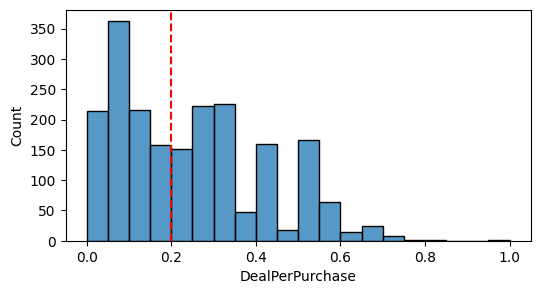

In [35]:
plt.figure(figsize=(6,3))
sns.histplot(x=df['DealPerPurchase'], bins=20)
median = df['DealPerPurchase'].median()
plt.axvline(median, color='red', linestyle='--')
print('Median: {}'.format(median))

*   Verificaremos se há valores discrepantes > limite (mediana + 1,5 x iqr) e atualizaremos



In [36]:
cols = ['Age','Income',
        'Recency', 'NumWebVisitsMonth', 'Customer_Days',
        'MntTotal', 'MntRegularProds','MntWines', 'MntFruits','MntMeatProducts',
        'MntFishProducts', 'MntSweetProducts','MntGoldProds',
        'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases',
        'NumPurchases', 'AvgMntPerPurchase', 'AvgRegMntPerPurchase', 'DealPerPurchase'
       ]

for column in cols:
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    q95 = df[column].quantile(0.95)
    iqr = q3 - q1
    median = df[column].median()
    outlier_limit = median + 1.5*iqr

    # Count the number of values above limit
    outlier_count = (df[column] > outlier_limit).sum()
    df.loc[df[column] > outlier_limit, column] = outlier_limit

    print('{:>20}: {} outliers set to median+1.5xiqr:{}'.format(column,  outlier_count, outlier_limit))

                 Age: 5 outliers set to median+1.5xiqr:80.0
              Income: 13 outliers set to median+1.5xiqr:100461.625
             Recency: 0 outliers set to median+1.5xiqr:124.0
   NumWebVisitsMonth: 9 outliers set to median+1.5xiqr:12.0
       Customer_Days: 20 outliers set to median+1.5xiqr:4286.0
            MntTotal: 78 outliers set to median+1.5xiqr:1862.75
     MntRegularProds: 103 outliers set to median+1.5xiqr:1704.25
            MntWines: 171 outliers set to median+1.5xiqr:895.5
           MntFruits: 327 outliers set to median+1.5xiqr:56.0
     MntMeatProducts: 323 outliers set to median+1.5xiqr:387.25
     MntFishProducts: 328 outliers set to median+1.5xiqr:82.5
    MntSweetProducts: 329 outliers set to median+1.5xiqr:57.125
        MntGoldProds: 299 outliers set to median+1.5xiqr:94.5
   NumDealsPurchases: 136 outliers set to median+1.5xiqr:5.0
     NumWebPurchases: 46 outliers set to median+1.5xiqr:10.0
 NumCatalogPurchases: 104 outliers set to median+1.5xiqr:8.0


*   Continuaremos explorando os dados e analisando a relação entre as variáveis.

### **Renda**

Median: 51650.5


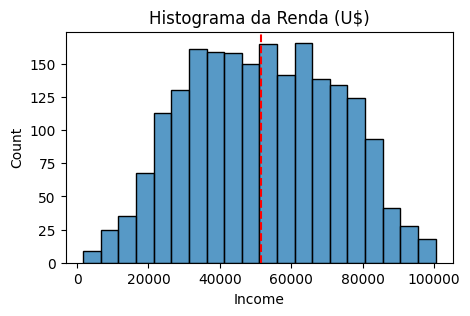

In [37]:
# Histograma da Renda
plt.figure(figsize=(5,3))
sns.histplot(x=df['Income'])
median = df['Income'].median()
plt.axvline(median, color='red', linestyle='--')
plt.title("Histograma da Renda (U\$)")
print('Median: {}'.format(median))

### **Total Gasto**

Median: 396.5


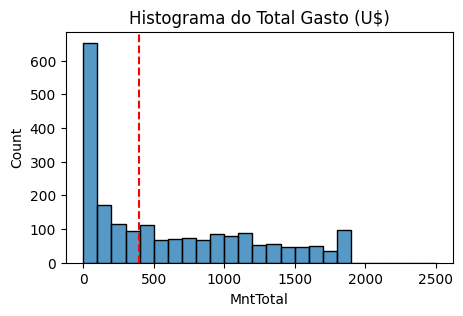

In [38]:
# Total Gasto
plt.figure(figsize=(5,3))
sns.histplot(x=df['MntTotal'], bins=range(0,2600,100))
median = df['MntTotal'].median()
plt.axvline(median, color='red', linestyle='--')
plt.title("Histograma do Total Gasto (U\$)")
print('Median: {}'.format(median))



### **Resposta a campanha**

Agora vamos nos concentrar nos dados da campanha:
*     Comparar a campanha alvo com campanhas anteriores e identificar quaisquer relacionamentos.
*   Explorar qualquer relação nas campanhas com dados demográficos, compras, canais e atividades.

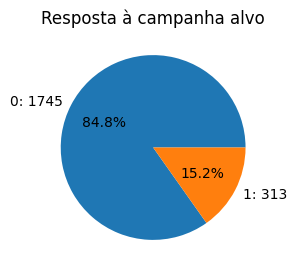

In [39]:
fig = plt.figure(figsize=(3,3))
data=df['Response'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%'
        )
plt.title('Resposta à campanha alvo');

*   15,2% aceitaram a oferta da última campanha

# **3 - Análise dos dados**

## **Correlação entre as variáveis**


A seguir, analisamos a campanha e outros dados do cliente

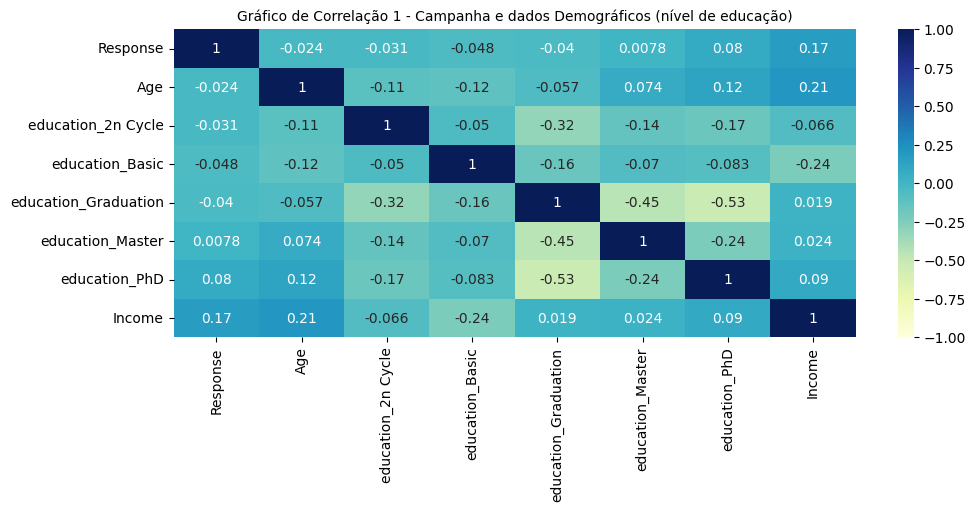

In [40]:
# Gráfico de correlação
plt.figure(figsize=(11,4))
sns.heatmap(df[['Response',
               'Age', 'education_2n Cycle', 'education_Basic', 'education_Graduation',
                'education_Master', 'education_PhD', 'Income'
               ]].corr(), vmin=-1, vmax=1, annot=True, cmap='YlGnBu')
plt.title('Gráfico de Correlação 1 - Campanha e dados Demográficos (nível de educação)',
          fontsize=10)
plt.show();

Verificando a correlação entre as variáveis:

*   Observamos que a Renda está positivamente correlacionada com a nossa campanha. (Income vs Responde);
*   A Renda desempenha um papel importante no poder de compra dos clientes, ou seja, o aumento na renda leva a uma melhoria na compra de produtos, o que influência de certa forma a resposta dos clientes;
*   No entanto, é importante observar que a idade não se correlaciona com a Campanha, isso é um tanto estranho, mas investigaremos isso mais detalhadamente em análise subsequentes.



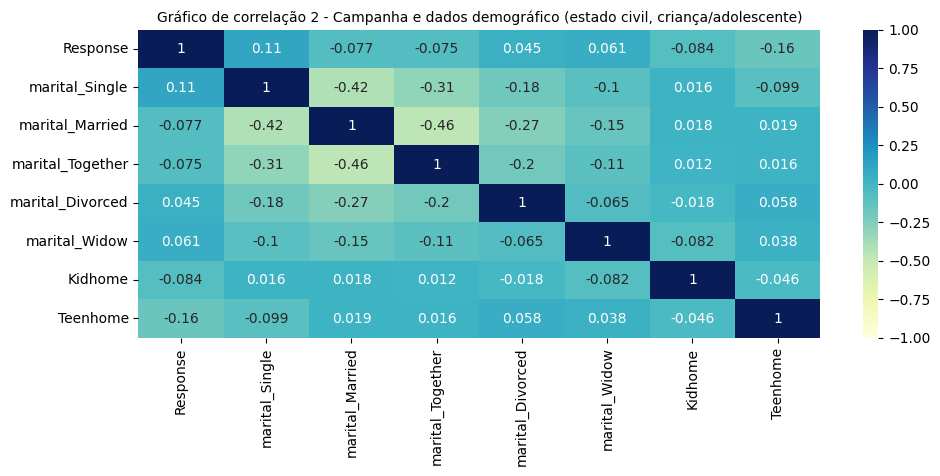

In [41]:
# Incluindo a resposta a campanha
# Gráfico de correlação
plt.figure(figsize=(11,4))
sns.heatmap(df[['Response',
                'marital_Single',
                'marital_Married', 'marital_Together', 'marital_Divorced',
                'marital_Widow', 'Kidhome', 'Teenhome'
               ]].corr(), vmin=-1, vmax=1, annot=True, cmap='YlGnBu')
plt.title('Gráfico de correlação 2 - Campanha e dados demográfico (estado civil, criança/adolescente)',
          fontsize=10)
plt.show();

*   Observamos que, ter adolescente em casa e família maiores são negativamente correlacionados com a resposta à campanha;
*   Enquanto, os clientes solteiros estão positivamente correlacionados à resposta a campanha.

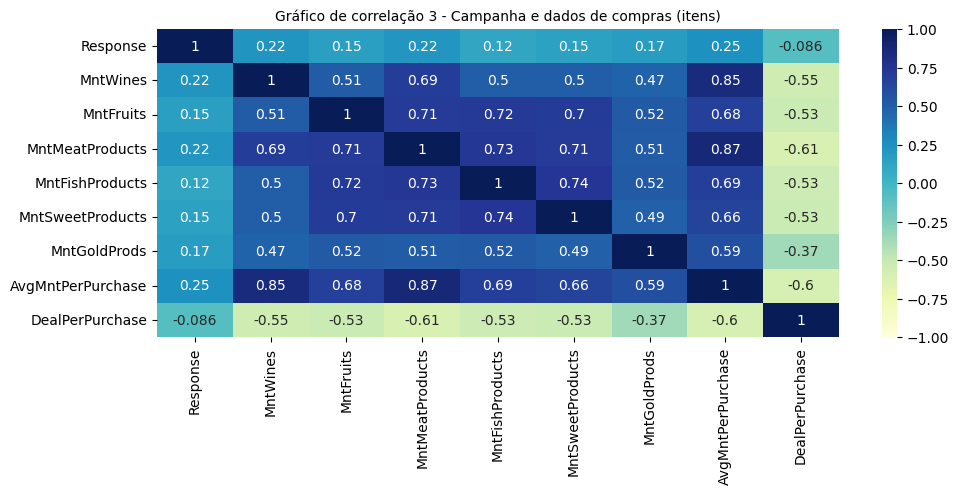

In [42]:
# Incluindo a resposta a nossa campanha
# Gráfico de correlação
plt.figure(figsize=(11,4))
sns.heatmap(df[['Response', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                'MntSweetProducts','MntGoldProds', 'AvgMntPerPurchase', 'DealPerPurchase']].corr(), vmin=-1, vmax=1, annot=True, cmap='YlGnBu')
plt.title('Gráfico de correlação 3 - Campanha e dados de compras (itens)',
          fontsize=10)
plt.show();

*   As campanhas têm correlação positiva com as compras.

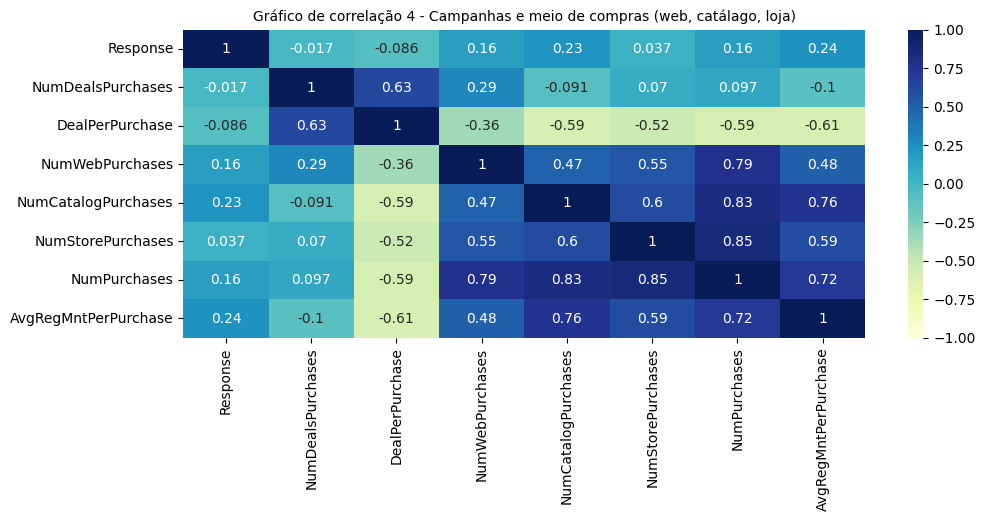

In [43]:
# Incluindo os meios de compras
# Gráfico de correlação
plt.figure(figsize=(11,4))
sns.heatmap(df[['Response','NumDealsPurchases','DealPerPurchase', 'NumWebPurchases','NumCatalogPurchases',
                'NumStorePurchases', 'NumPurchases', 'AvgRegMntPerPurchase']].corr(), vmin=-1, vmax=1, annot=True, cmap='YlGnBu')
plt.title('Gráfico de correlação 4 - Campanhas e meio de compras (web, catálago, loja)',
          fontsize=10)
plt.show();

*   As campanhas por catálogo estão positivamente correlacionadas com a Resposta a campanha alvo;
* Vemos a correlação positiva no número de compras e compras na web;
* Excluiremos variáveis altamente correlacionadas do modelo de regressão logística.

Text(0, 0.5, '%')

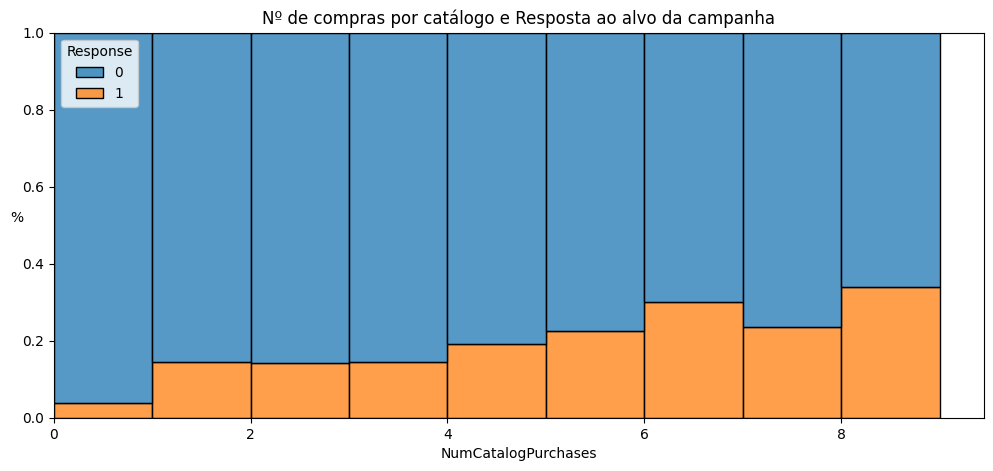

In [44]:
# Gráfico de barras empilhadas
plt.figure(figsize=(12,5))
sns.histplot(data=df,
             x='NumCatalogPurchases',
             bins=range(0,15),
             hue='Response',
             multiple='fill')
plt.title('Nº de compras por catálogo e Resposta ao alvo da campanha',
          fontsize=12)
plt.ylabel('%', rotation=0)

*  Quanto mais compras no catálogo, maior a probabilidade de aceitar a nova campanha.

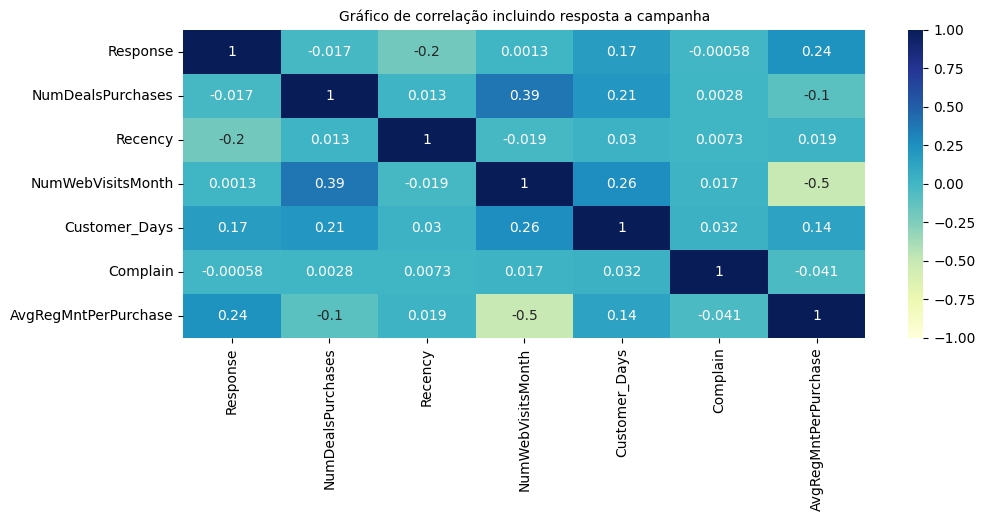

In [45]:
# Incluindo resposta a campanha
# Gráfico de correlação
plt.figure(figsize=(11,4))
sns.heatmap(df[['Response','NumDealsPurchases', 'Recency', 'NumWebVisitsMonth',
                'Customer_Days', 'Complain','AvgRegMntPerPurchase',
                 ]].corr(), vmin=-1, vmax=1, annot=True, cmap='YlGnBu')
plt.title('Gráfico de correlação incluindo resposta a campanha',
          fontsize=10)
plt.show();

*   Vemos uma correlação positiva na resposta a nova campanha, e correlação negativa com o tempo para retorno.

***Renda, gastos e resposta a nova campanha***


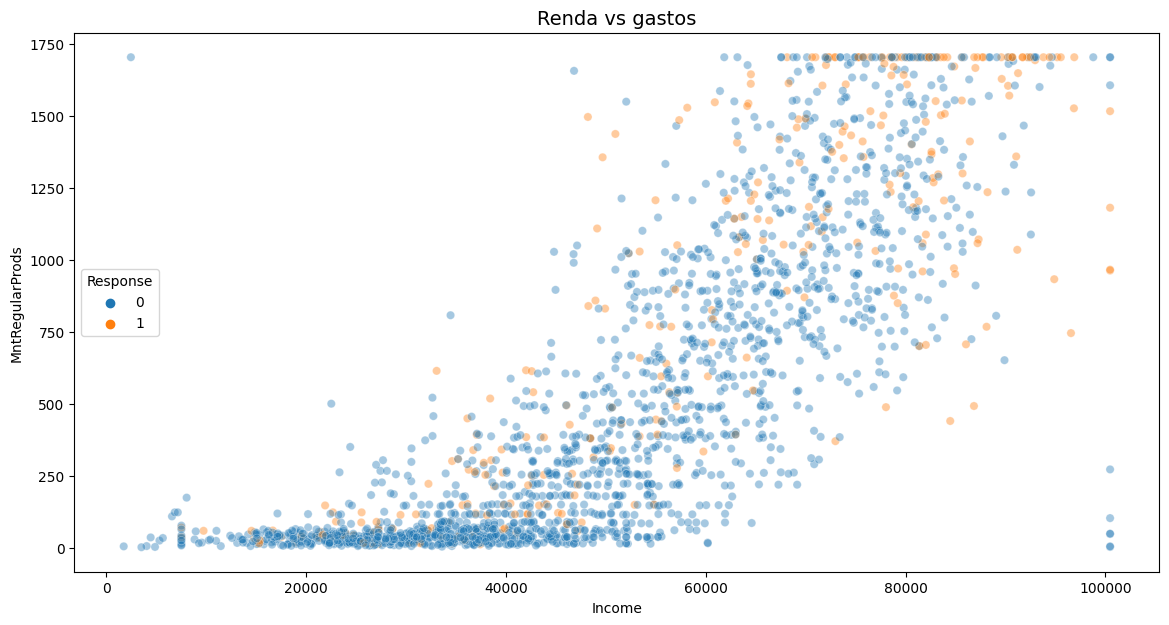

In [46]:
# Gráfico de dispersão
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df, x='Income', y='MntRegularProds', hue='Response', alpha=0.4)
plt.title('Renda vs gastos', fontsize='14');

Eliminaremos recursos que adicionamos e que não agregaram valor.

In [47]:
df = df.drop(['NumPurchases', 'AvgRegMntPerPurchase'], axis=1)

# **4 - Construção do modelo**

In [48]:
# Preparar os dados
df_lr = df.copy()
df_lr = df_lr.reset_index()
df_lr.columns

Index(['index', 'Age', 'education_2n Cycle', 'education_Basic',
       'education_Graduation', 'education_Master', 'education_PhD', 'Income',
       'marital_Single', 'marital_Married', 'marital_Together',
       'marital_Divorced', 'marital_Widow', 'Kidhome', 'Teenhome', 'Recency',
       'NumWebVisitsMonth', 'Customer_Days', 'Complain', 'MntTotal',
       'MntRegularProds', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'Response', 'AvgMntPerPurchase',
       'DealPerPurchase'],
      dtype='object')

*   Para regressão, eliminaremos as variáveis independentes altamente correlacionadas

In [49]:
df_lr = df_lr.drop([
                    'AvgMntPerPurchase',
                    'DealPerPurchase'
                   ], axis=1)
df_lr.columns

Index(['index', 'Age', 'education_2n Cycle', 'education_Basic',
       'education_Graduation', 'education_Master', 'education_PhD', 'Income',
       'marital_Single', 'marital_Married', 'marital_Together',
       'marital_Divorced', 'marital_Widow', 'Kidhome', 'Teenhome', 'Recency',
       'NumWebVisitsMonth', 'Customer_Days', 'Complain', 'MntTotal',
       'MntRegularProds', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'Response'],
      dtype='object')

In [50]:
cols = ['Age','Income',
        'Recency', 'NumWebVisitsMonth', 'Customer_Days',
        'MntTotal', 'MntRegularProds','MntWines', 'MntFruits','MntMeatProducts',
        'MntFishProducts', 'MntSweetProducts','MntGoldProds',
        'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases', 'NumStorePurchases'
        #'DealPerPurchase'
       ]

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=True, with_std=True)

df_lr[cols] = pd.DataFrame(scaler.fit_transform(df_lr[cols]), columns=df_lr[cols].columns)
df_lr

,index,Age,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,Income,marital_Single,marital_Married,marital_Together,marital_Divorced,marital_Widow,Kidhome,Teenhome,Recency,NumWebVisitsMonth,Customer_Days,Complain,MntTotal,MntRegularProds,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,Response
0,0,-0.097838,0,0,1,0,0,1.589845,0,0,0,1,0,0,0,-1.688454,-1.835223,-1.457151,0,1.014133,0.764161,-0.331733,1.816238,1.760372,1.804490,1.812358,1.817743,-0.835464,-0.018542,0.577734,0.077396,1
1,1,0.671981,0,0,1,0,0,0.251841,1,0,0,0,0,0,0,-1.688454,-0.126610,-1.452839,0,-0.036485,-0.020215,0.586761,-0.644503,-0.480514,-0.653861,-0.881036,0.042903,-0.835464,1.137794,0.182725,0.390017,1
2,2,0.928587,0,0,1,0,0,0.742597,0,1,0,0,0,0,1,-1.688454,-1.408070,-1.310542,0,-0.595215,-0.599418,-0.515432,-0.355004,-0.516084,-0.393374,-0.786738,-0.173164,-0.835464,-0.403987,-0.212284,-0.235225,0
3,3,0.158768,0,0,1,0,0,-0.935359,0,0,1,0,0,1,1,-1.688454,0.727696,-2.069461,0,-1.006550,-0.980712,-0.929589,-0.885753,-0.928691,-0.881788,-0.881036,-1.099168,-0.835464,-1.174878,-1.002301,-1.173088,0
4,4,-1.723011,0,0,1,0,0,-1.465854,1,0,0,0,0,1,0,-1.688454,0.727696,-1.668441,0,-0.869439,-0.897191,-0.942949,-0.113755,-0.765071,-0.523617,-0.881036,-0.049697,-0.116056,-0.403987,-0.607292,-1.173088,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2053,2235,-0.611050,0,0,0,0,1,0.704449,0,0,0,1,0,0,1,1.726264,-0.553763,0.043439,0,0.155471,0.108699,0.279483,-0.017256,-0.039451,0.648577,1.382122,1.308441,-0.116056,0.366903,-0.212284,1.640501,0
2054,2236,-0.696586,1,0,0,0,0,-1.003744,0,1,0,0,0,1,0,1.726264,1.154850,0.741989,0,-0.931139,-0.929873,-0.946289,-0.403254,-0.843324,-0.784105,-0.503843,-0.605299,-0.835464,-1.174878,-1.002301,-0.860467,0
2055,2237,-0.611050,0,0,1,0,0,-0.268093,0,0,0,1,0,1,0,1.726264,1.154850,2.104594,0,-0.495809,-0.465058,-0.345093,-0.789253,-0.309780,-0.393374,-0.645291,-0.667033,-0.116056,0.752349,-0.607292,-0.235225,0
2056,2238,-0.782121,0,0,1,0,0,0.672764,0,1,0,0,0,0,0,1.726264,-0.980916,0.974840,0,1.344915,1.396019,-0.071215,0.947741,1.819062,1.804490,1.812358,0.845439,-0.835464,0.366903,0.577734,1.327880,0


## ***Regressão Logística***

In [52]:
# Isolando a variável de resultado
y = df_lr['Response']

# Selecionando os recursos a serem usados no modelo
X = df_lr.drop('Response', axis=1)

In [53]:
# Divida os dados em conjunto de treinamento e conjunto de teste
X_train, X_lr_test, y_train, y_lr_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [54]:
# Construa o modelo de regressão logistica e ajuste-o ao conjunto de dados de treinamento
log_model = LogisticRegression(random_state=42, max_iter=2000)
log_clf = log_model.fit(X_train, y_train)

In [55]:
# Previsões no conjunto de testes
y_pred = log_clf.predict(X_lr_test)

print('Resultados da regressão logistica em dados de teste')
print("Accuracy:", "%.4f" % accuracy_score(y_lr_test, y_pred))
print("Precision:", "%.4f" % precision_score(y_lr_test, y_pred))
print("Recall:", "%.4f" % recall_score(y_lr_test, y_pred))
print("F1 Score:", "%.4f" % f1_score(y_lr_test, y_pred))

Resultados da regressão logistica em dados de teste
Accuracy: 0.8913
Precision: 0.7895
Recall: 0.3846
F1 Score: 0.5172


*   Nossa pontuação de recall é baixa. Vamos ver então, os falsos negativos.

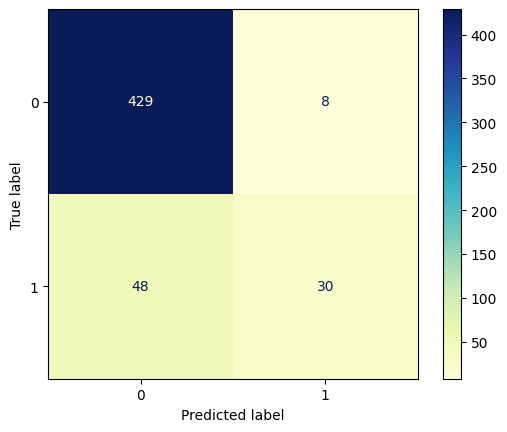

In [56]:
# Calcula valores para matriz confusão
log_cm = confusion_matrix(y_lr_test, y_pred, labels=log_clf.classes_)

# CCria exibição da matriz confusão
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm,
                                  display_labels=log_clf.classes_
                                  )
# Plotar a matriz
log_disp.plot(values_format='', cmap="YlGnBu")
# Exibir o gráfico
plt.show()

*   Com um recall de 38,5%, estamos perdendo muitos possíveis entrevistados. Vamos verificar outros modelos.

* Mas antes de fazermos isso, vamos ver o que o modelo identificou como variáveis importantes.

**Coeficientes de regressão - Importância do variável**

In [57]:
# Cria uma lista de nome coluna e coeficiente
feature_importance = list(zip(X_train.columns, log_model.coef_[0]))

# Classifica a lista por valor do coeficiente
feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)

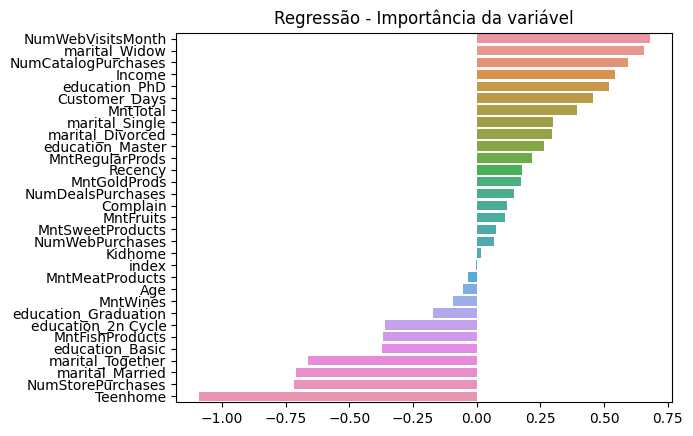

In [58]:
sns.barplot(x=[x[1] for x in feature_importance],
           y=[x[0] for x in feature_importance],
           orient='h')
plt.title('Regressão - Importância da variável');

## ***Árvore de Decisão***

In [59]:
# Isolando a variável de resultado
y = df['Response']

# Selecionando os recursos a serem usados no modelo
X = df.drop('Response', axis=1)

In [60]:
# Divida os dados em conjunto de treinamento e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [61]:
tree = DecisionTreeClassifier(random_state=0)
# Hiper parametros
cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [1, 2, 5, 8],
             'min_samples_split': [2, 4, 6]
             }
# scoring
scoring = {'accuracy', 'precision', 'recall', 'f1'}
# m
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='recall')

In [62]:
%%time
tree1.fit(X_train, y_train)

CPU times: user 4.48 s, sys: 12.9 ms, total: 4.49 s
Wall time: 4.54 s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [1, 2, 5, 8],
                         'min_samples_split': [2, 4, 6]},
             refit='recall', scoring={'precision', 'f1', 'accuracy', 'recall'})

In [63]:
# Checando os melhores parametros
tree1.best_params_

{'max_depth': None, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [64]:
# Chegando o AUC score on CV
tree1.best_score_


0.3485534774985389

In [65]:
# Use o modelo de árvore de decisão para obter previsões no conjunto de testes
y_pred = tree1.predict(X_test)

print('Resultados da Árvore de Decisão em dados de teste')

print("Accuracy:", "%.4f" % accuracy_score(y_test, y_pred))
print("Precision:", "%.4f" % precision_score(y_test, y_pred))
print("Recall:", "%.4f" % recall_score(y_test, y_pred))
print("F1 Score:", "%.4f" % f1_score(y_test, y_pred))

Resultados da Árvore de Decisão em dados de teste
Accuracy: 0.8447
Precision: 0.4821
Recall: 0.3462
F1 Score: 0.4030


*   Os resultados e, especificamente, a pontuação de recall são inferiores aos do modelo de regressão.

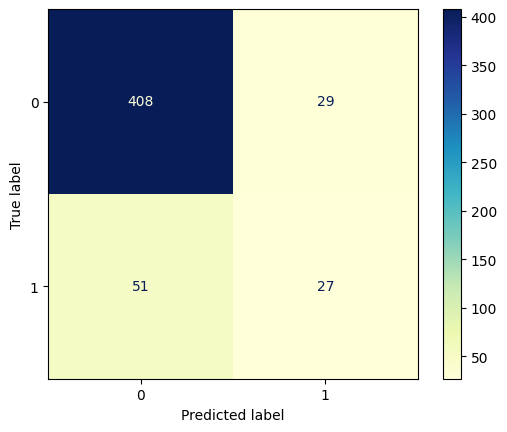

In [66]:
# Calcula valores para matriz confusão
tree_cm = confusion_matrix(y_test, y_pred, labels=tree1.classes_)

# Criar exibição da mamtriz confusão
tree_disp = ConfusionMatrixDisplay(confusion_matrix=tree_cm,
                                  display_labels=tree1.classes_)
# Plot o gráfico
tree_disp.plot(values_format='', cmap = 'YlGnBu')

# Exibe o gráfico
plt.show()

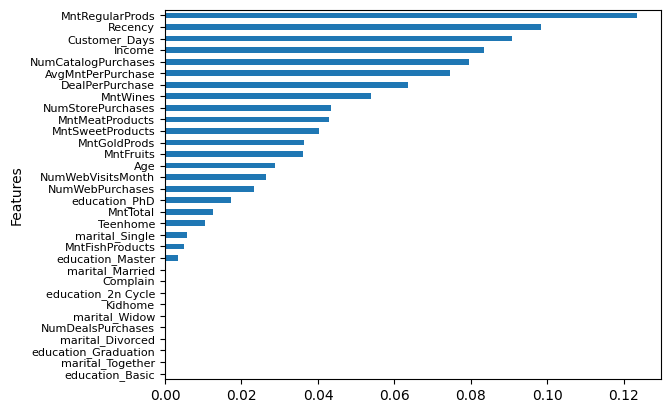

In [67]:
importances = tree1.best_estimator_.feature_importances_

decision_tree_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

fig, ax = plt.subplots()
decision_tree_importances.plot.barh(ax=ax);

ax.invert_yaxis()
ax.tick_params(axis='y', labelsize=8)
ax.set_ylabel('Features', fontsize=10)


plt.show()

*   A aceitação geral da campanha é o principal recurso. Juntamente com Compras a Regulares, Número  de dias desde a última compra.

## ***Classificador XGBoost***

In [68]:
# Isolando a variável resposta
y = df['Response']

# Selecionando os recursos a serem usados no modelo
X = df.drop('Response', axis=1)

In [69]:
# Divida os dados em conjunto de treinamento e conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [70]:
# 1.
xgb = XGBClassifier(objective='binary:logistic', random_state=42)

# 2. Cria um dicionário de hiperparâmetros para ajustar
cv_params = {'max_depth': [3], #[2, 3, 6, 9],
             'min_child_weight': [ 5],#[ 1,2,3,4,5, 10],
             'learning_rate': [.7],#[0.1, .3, .5, .7],
             'n_estimators': [150] #[50, 100, 150, 200, 300, 500]
             }

# 3. Defina um dicionário de métricas de pontuação para captar
scoring = {'accuracy', 'precision', 'recall', 'f1'}

# 4.
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=4, refit='recall')

In [71]:
%%time
xgb_cv.fit(X_train, y_train)

CPU times: user 1.27 s, sys: 12.2 ms, total: 1.28 s
Wall time: 708 ms


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.7], 'max_depth': [3],
                         'min_child_weight': [5], 'n_estimators': [150]},
             refit='recall', scoring={'precision', 'f1', 'accuracy', 'recall'})

In [72]:
xgb_cv.best_score_

0.3576125073056692

In [73]:
xgb_cv.best_params_

{'learning_rate': 0.7,
 'max_depth': 3,
 'min_child_weight': 5,
 'n_estimators': 150}

In [74]:
xgb_test_preds = xgb_cv.best_estimator_.predict(X_test)

print('Resultados XGBoost em dados de teste')

print("Accuracy:", "%.4f" % accuracy_score(y_test, xgb_test_preds))
print("Precision:", "%.4f" % precision_score(y_test, xgb_test_preds))
print("Recall:", "%.4f" % recall_score(y_test, xgb_test_preds))
print("F1 Score:", "%.4f" % f1_score(y_test, xgb_test_preds))

Resultados XGBoost em dados de teste
Accuracy: 0.8505
Precision: 0.5088
Recall: 0.3718
F1 Score: 0.4296


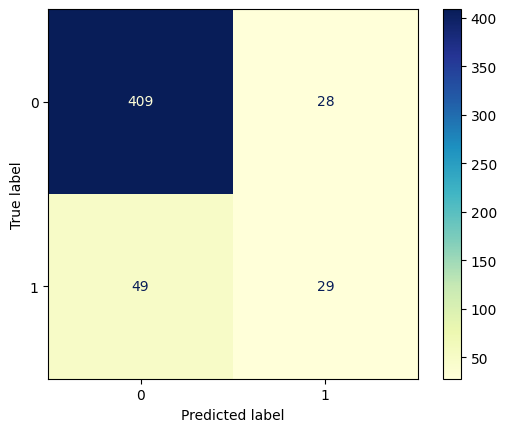

In [75]:
cm = confusion_matrix(y_test, xgb_test_preds, labels=xgb_cv.classes_)

# Plota matriz confusão
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=xgb_cv.classes_)
disp.plot(cmap = 'YlGnBu');



*   XGB teve o melhor desempenho. Vejamos os recursos que o modelo XGB identificou como importantes.

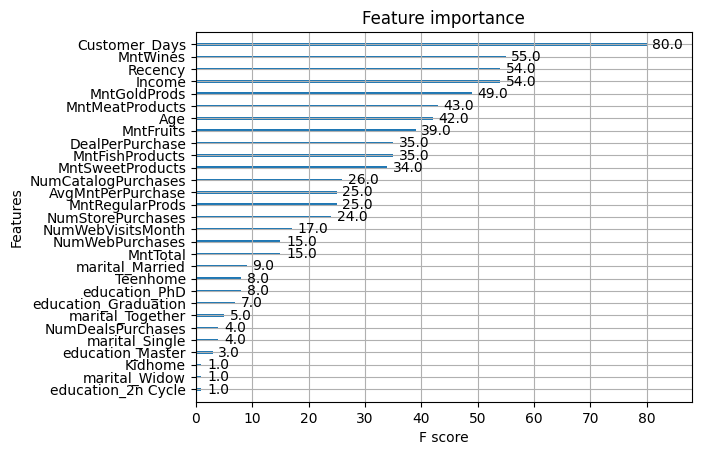

In [76]:
plot_importance(xgb_cv.best_estimator_);

*   O Customer Days é o principal recurso. Juntamente com Renda e Tempo desde a última compra.

### ***Comparação e seleção de modelos***

Logistic Regression Results on Test Data

*    Accuracy: 0.891262
*    Precision: 0.789474
*    Recall: 0.384615
*    F1 Score: 0.517241

Decision Tree Results on Test Data
* Accuracy: 0.844660
* Precision: 0.482143
* Recall: 0.346154
* F1 Score: 0.402985

XGBoost Results on Test Data
* Accuracy: 0.871845
* Precision: 0.596774
* Recall: 0.474359
* F1 Score: 0.528571



O XGBoost teve o melhor desempenho dos 3 modelos em nossa métrica de recall alvo. A regressão logística teve desempenho superior em métricas de exatidão e precisão.

### ***Ajustando o modelo selecionado***

Com o modelo de melhor desempenho, nossa taxa de recall ainda é baixa e estamos perdendo muitos entrevistados. Como podemos adaptar nosso modelo para cumprir a meta de negócios?

O limite de decisão padrão do modelo é 0,5. Prevê-se que uma probabilidade de 50% ou mais seja uma resposta.

Em vez da probabilidade de 0,5 do modelo, usamos uma probabilidade mais baixa para prever mais respostas. Isso resultaria em mais falsos positivos. Mas, conforme discutimos com a equipe de Marketing, eles concordam em enviar a oferta para mais clientes e não há oferta alternativa.

Em outras palavras, podemos aumentar nossa taxa de recall em detrimento da taxa de precisão.

Portanto, obteremos as probabilidades previstas do nosso modelo de regressão. Em seguida, preveja uma resposta de 1 (Aceitar oferta da campanha) para qualquer probabilidade acima de 30%.

In [77]:
# Obtenha probabilidades previstas nos dados de teste
xgb_predicted_probabilities = xgb_cv.predict_proba(X_test)

# Cria uma lista de probabilidade de alvo
xgb_probs = [x[1] for x in xgb_predicted_probabilities]

# Cria uma matriz de novas previsões que atribua 1 a qualquer valor >= 0.3
new_xgb_preds = np.array([1 if x >= 0.3 else 0 for x in xgb_probs])

In [78]:
print('Resultados do XGB Boost em dados de teste e um limite de probabilidade de 30%')

print("Accuracy:", "%.4f" % accuracy_score(y_test, new_xgb_preds))
print("Precision:", "%.4f" % precision_score(y_test, new_xgb_preds))
print("Recall:", "%.4f" % recall_score(y_test, new_xgb_preds))
print("F1 Score:", "%.4f" % f1_score(y_test, new_xgb_preds))



Resultados do XGB Boost em dados de teste e um limite de probabilidade de 30%
Accuracy: 0.8427
Precision: 0.4831
Recall: 0.5513
F1 Score: 0.5150


*   A taxa de recall melhorou reduzindo o limite de probabilidade para 30%.
*   Como esperado, a taxa de precisão caiu.

Qual é a probabilidade ideal para o nosso caso? A equipe de Marketing tem orçamento para enviar a oferta a 30% dos clientes. Podemos adaptar essa probabilidade para atingir o número desejado de clientes.

In [79]:
new_xgb_preds.mean()

0.17281553398058253

*   Com uma probabilidade de 30%, prevemos resposta de 17,28\% dos clientes (ou seja, recomendamos a oferta a 17,28\% dos clientes).

A seguir encontraremos o limite de probabilidade de enviar a oferta a 30\% dos clientes de acordo com o orçamento.

Probabilidade do modelo XGB se o orçamento permitir o envio da oferta para até 30\% dos clientes: 0,05

In [80]:
# we will test prob from .5 down to .01
possible_probs = np.arange(0.5, 0.01, -0.01)

ideal_prob = 0

for possible_prob in possible_probs:
    # Create a new array of {0, 1} predictions based on new threshold
    preds = np.array([1 if x >= possible_prob else 0 for x in xgb_probs])
    # when predicted response is more than 30% of total, we can identify the ideal prob
    if preds.mean() > .3:
        ideal_prob = possible_prob + 0.01
        break

new_xgb_preds = np.array([1 if x >= ideal_prob else 0 for x in xgb_probs])

print('Probabilidade do modelo XGB se o orçamento permitir o envio da oferta para até 30% dos clientes:',' %.2f' % ideal_prob)

Probabilidade do modelo XGB se o orçamento permitir o envio da oferta para até 30% dos clientes:  0.05


In [81]:
print('Resultados XGB em dados de teste e um limite de probabilidade de:', '%.3f' % ideal_prob)

print("Accuracy:", "%.4f" % accuracy_score(y_test, new_xgb_preds))
print("Precision:", "%.4f" % precision_score(y_test, new_xgb_preds))
print("Recall:", "%.4f" % recall_score(y_test, new_xgb_preds))
print("F1 Score:", "%.4f" % f1_score(y_test, new_xgb_preds))

print('Clientes recebendo a oferta ', ' %.3f' %new_xgb_preds.mean() )

Resultados XGB em dados de teste e um limite de probabilidade de: 0.050
Accuracy: 0.7825
Precision: 0.3896
Recall: 0.7692
F1 Score: 0.5172
Clientes recebendo a oferta   0.299


*   Para recomendar 30% do banco de dados, temos que diminuir o limite de probabilidade do modelo para 0,05.
*   A taxa de recall melhorou. A precisão caiu significativamente.

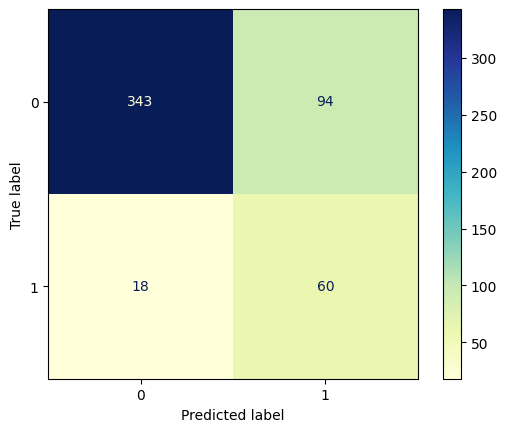

In [82]:
# Matriz confusão
cm = confusion_matrix(y_test, new_xgb_preds, labels=xgb_cv.classes_)

# Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=xgb_cv.classes_)
disp.plot(cmap = 'YlGnBu');

**O que mais podemos fazer?**

Podemos verificar o desempenho do modelo de regressão se ajustarmos seu limite de probabilidade.

In [83]:
#  Obtenha probabilidades previstas nos dados de teste
log_predicted_probabilities = log_clf.predict_proba(X_lr_test)

# Crie uma lista de probabilidade de alvo
log_probs = [x[1] for x in log_predicted_probabilities]

# Crie uma matriz de novas previsões que atribua 1 a qualquer valor >= 0,3
new_log_preds = np.array([1 if x >= 0.3 else 0 for x in log_probs])

In [84]:
print('Resultados de regressão logística em dados de teste e um limite de probabilidade de 30%')

print("Accuracy:", "%.4f" % accuracy_score(y_lr_test, new_log_preds))
print("Precision:", "%.4f" % precision_score(y_lr_test, new_log_preds))
print("Recall:", "%.4f" % recall_score(y_lr_test, new_log_preds))
print("F1 Score:", "%.4f" % f1_score(y_lr_test, new_log_preds))

Resultados de regressão logística em dados de teste e um limite de probabilidade de 30%
Accuracy: 0.8641
Precision: 0.5476
Recall: 0.5897
F1 Score: 0.5679


*  Seu desempenho está próximo do modelo XGB com limite de 30%.

In [85]:
# Testaremos a probabilidade de 0.5 até 0.01
possible_probs = np.arange(0.5, 0.01, -0.01)

ideal_prob = 0

for possible_prob in possible_probs:
    # Crie uma nova matriz de {0, 1} previsões com base no novo limite
    preds = np.array([1 if x >= possible_prob else 0 for x in log_probs])
    # # quando a resposta prevista é superior a 30% do total, podemos identificar a probabilidade ideal
    if preds.mean() > .3:
        ideal_prob = possible_prob + 0.01
        break

new_log_preds = np.array([1 if x >= ideal_prob else 0 for x in log_probs])

print('Probabilidade do modelo de regressão se o orçamento permitir o envio de oferta para até 30\% dos clientes:', ' %.2f' % ideal_prob)

Probabilidade do modelo de regressão se o orçamento permitir o envio de oferta para até 30\% dos clientes:  0.17


In [86]:


print('Resultados de regressão logística em dados de teste e um limite de probabilidade de:' , ' %.2f' % ideal_prob)

print("Accuracy:", "%.6f" % accuracy_score(y_lr_test, new_log_preds))
print("Precision:", "%.6f" % precision_score(y_lr_test, new_log_preds))
print("Recall:", "%.6f" % recall_score(y_lr_test, new_log_preds))
print("F1 Score:", "%.6f" % f1_score(y_lr_test, new_log_preds))

print('Clientes recebendo a oferta ', ' %.3f' %new_log_preds.mean() )



Resultados de regressão logística em dados de teste e um limite de probabilidade de:  0.17
Accuracy: 0.809709
Precision: 0.433333
Recall: 0.833333
F1 Score: 0.570175
Clientes recebendo a oferta   0.291


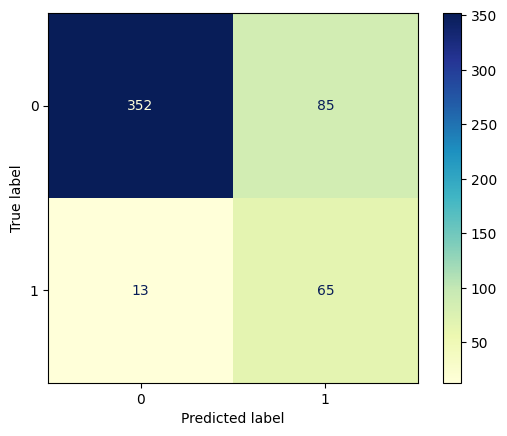

In [87]:
# Matriz confusão
cm = confusion_matrix(y_lr_test, new_log_preds, labels=log_clf.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=log_clf.classes_)
disp.plot(cmap="YlGnBu");



Ajustar o limite do modelo de regressão logística para atingir 30% do cliente proporcionou melhores resultados do que o modelo XGB.

Resultados de regressão logística em dados de teste atingem 29,1% dos clientes

*     Limite de probabilidade de 0,17
*     Accuracy:: 0,809709
*     Precision: 0,433333
*     Recall: 0,833333

Resultados XGB em dados de teste atingirão 29,3% dos clientes

*     Limite de probabilidade de 0,050
*     Precisão: 0,780583
*     Precision: 0,384106
*     Recall: 0,743590

# **5-  Recomendação**



*   Com base em nossas descobertas, a Regressão Logística Binomial é o melhor modelo para nosso propósito. Ao ajustar o limite de probabilidade do modelo para 0,17 em vez de 0,5, alcançamos um recall de 0,83.

*   Isso ocorreu às custas da precisão. O número de falsos positivos é alto, mas está dentro do orçamento da campanha de ofertas e não oferece riscos. Minimizamos o número de falsos negativos e a oportunidade de receber e responder à oferta.